In [1]:
import os
import joblib
import numpy as np
import pandas as pd
from PIL import Image
from joblib import dump
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Plotting Data

Number of values for each class in the 'SkinTone' column:
1.0     29
3.0     19
2.0     17
4.0     12
1.5     11
5.0     10
3.5      9
2.5      7
8.0      6
5.5      5
7.0      4
6.0      4
4.5      4
9.0      3
8.5      3
10.0     3
6.5      3
Name: SkinTone, dtype: int64


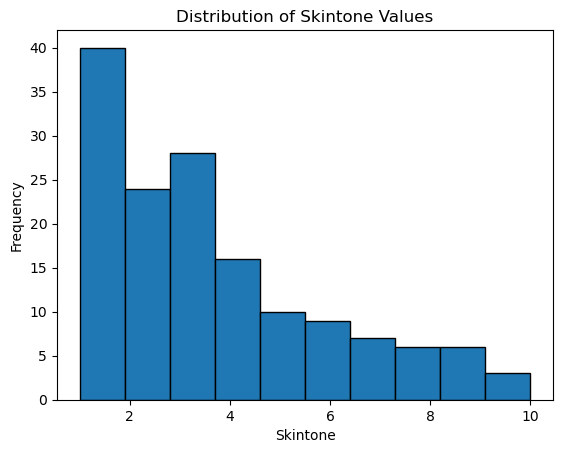

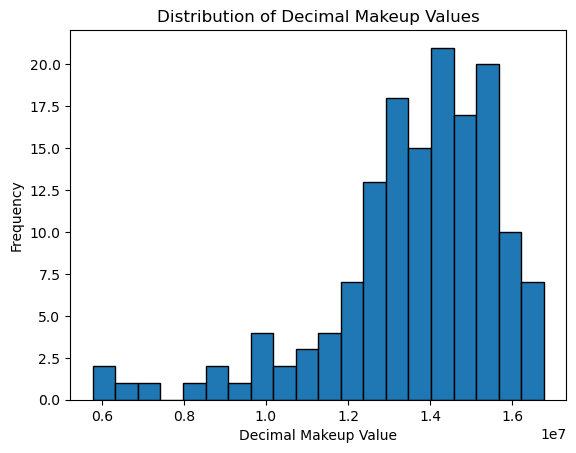

In [2]:
data = pd.read_excel('E:\\University\\FYP Stuff\\Dataset\\Youtube_Dataset_hardcode.xlsx')

# number of values for each class in the 'SkinTone' column
print("Number of values for each class in the 'SkinTone' column:")
print(data['SkinTone'].value_counts())

# distribution of Skintone values
plt.hist(data['SkinTone'], bins=10, edgecolor='black')
plt.xlabel('Skintone')
plt.ylabel('Frequency')
plt.title('Distribution of Skintone Values')
plt.show()

# distribution of Decimal Makeup Values
plt.hist(data['foundationColorCode'], bins=20, edgecolor='black')
plt.xlabel('Decimal Makeup Value')
plt.ylabel('Frequency')
plt.title('Distribution of Decimal Makeup Values')
plt.show()

Splitting and Training Model

In [6]:
# Splitting
X = data[['SkinTone']]
y = data['foundationColorCode']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Saving Model
model_save_path = 'E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Makeup_Recommender.joblib'
dump(model, model_save_path)

['E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Makeup_Recommender.joblib']

Evaluating and Plotting

In [7]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')
print(f'Training R-squared: {train_r2}')
print(f'Testing R-squared: {test_r2}')

Training Mean Squared Error: 1950565438402.1472
Testing Mean Squared Error: 1116340717304.776
Training R-squared: 0.6011408016270324
Testing R-squared: 0.5775018726385508


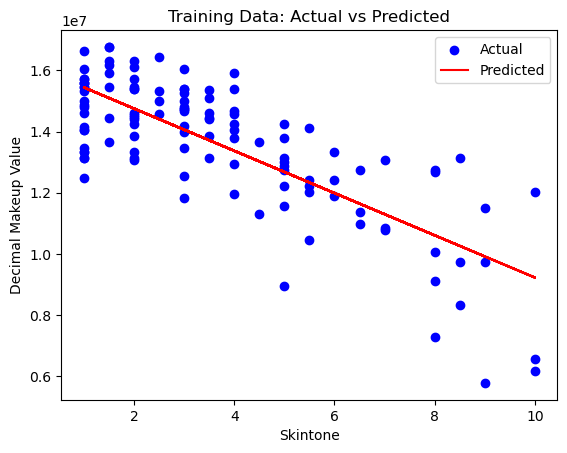

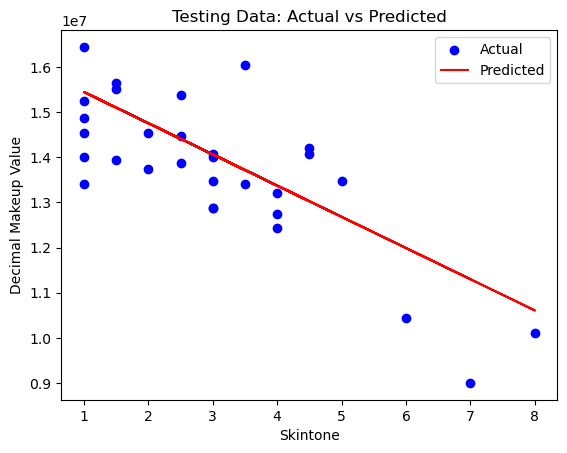

In [9]:
# Plot training predictions vs actual values
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel('Skintone')
plt.ylabel('Decimal Makeup Value')
plt.title('Training Data: Actual vs Predicted')
plt.legend()
plt.show()

# Plot testing predictions vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_test_pred, color='red', label='Predicted')
plt.xlabel('Skintone')
plt.ylabel('Decimal Makeup Value')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()
plt.show()

Predicting SkinTone

In [17]:
# Function to predict skintone using the model
def predict_skintone(model, folder_path):

    # Get list of image files in the folder path
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg') or f.endswith('.png')]
    folder_path = os.path.join(folder_path, image_files[0])

    # Preprocessing Image
    image = Image.open(folder_path)
    image = image.resize((224, 224))  
    image = np.array(image) / 255.0  
    image = np.expand_dims(image, axis=0) 

    #Predictions
    prediction = model.predict(image )
    skintone = np.argmax(prediction) + 1

    return skintone

# Inputs required
model = tf.keras.models.load_model('E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Skintone_Recognition_1.h5')
folder_path = 'E:\\University\\FYP Stuff\\Dataset\\mst-e_data\\A_testing\\face_resized'

skintone = predict_skintone(model, folder_path)
print("Predicted Skintone: MST",skintone)

1/1 [==============================] - 1s 657ms/step
Predicted Skintone: MST 4


Predicting Makeups

In [18]:
# Load the dataset
data = pd.read_excel('E:\\University\\FYP Stuff\\Dataset\\Youtube_Dataset_Final.xlsx')

# Load the trained model
model = joblib.load('E:\\University\\FYP Stuff\\Models For SkinTone Recognition\\Makeup_Recommender.joblib')

def find_makeup_by_skintone(skintone, tolerance=0.1):
    # Predict the decimal makeup value based on the given skintone
    predicted_decimal_value = model.predict(np.array(skintone).reshape(-1, 1))[0]  # Extract the single value
    
    # Define the range of decimal values based on the tolerance
    decimal_min = predicted_decimal_value - tolerance
    decimal_max = predicted_decimal_value + tolerance
    
    # Filter the DataFrame based on the predicted decimal value range
    filtered_data = data[(data['foundationColorCode'] >= decimal_min) & (data['foundationColorCode'] <= decimal_max)]

    print("Recommended Products:\n")
    
    # Print the filtered DataFrame with only three specified columns
    print(filtered_data[['cosmeticBrand', 'cosmeticShade', 'productLink']])

find_makeup_by_skintone(skintone, tolerance=100000)

Recommended Products:

          cosmeticBrand cosmeticShade  \
16        Armani Beauty           7.5   
87        Armani Beauty    5.5 medium   
108  Yves Saint Laurent           MN6   
113          KVD Beauty     Light 012   
128            Givenchy        4-W307   

                                           productLink  
16   http://https://www.giorgioarmanibeauty-usa.com...  
87   http://https://www.sephora.com/product/luminou...  
108  http://https://www.sephora.com/product/all-hou...  
113  http://https://www.ulta.com/p/good-apple-full-...  
128  http://https://www.sephora.com/product/givench...  


c:\Users\Danial1\.conda\envs\MyFirstEnv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
